## Charting Template


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import urllib
import requests
import riskfolio as rp
from datetime import datetime, timedelta
from copy import deepcopy

from highcharts import Highchart
from chart_builder import plot_chart, CHART_DEFAULTS
from IPython.display import display, HTML, display_html
import import_ipynb

# Chart libraries + settings
# plt.style.use('seaborn-whitegrid')
pd.options.mode.chained_assignment = None  # default='warn' - disable some pandas warnings
pd.options.display.float_format = '{:,.2f}'.format


### Chart Template

In [35]:
%%capture
# MatPlotLib settings
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from cycler import cycler

# Swan Colors
swan_colors = ['#31597F', '#7B96B0', '#C3D9E9', '#DAE1E8']
mpl.rcParams['lines.color'] = '#31597F'
mpl.rcParams['text.color'] = '#31597F'
mpl.rcParams['axes.prop_cycle'] = cycler(color=swan_colors)
mpl.rcParams['lines.linewidth'] = 1
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rcParams["figure.figsize"] = (10,5)
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=10)   
plt.rc('xtick', labelsize=10, color='#00305E')  
plt.rc('ytick', labelsize=10, color='#00305E')    
plt.rc('legend', fontsize=12)
plt.rc('font', size=8)          

import matplotlib.ticker as ticker

# Define the formatter
formatter = ticker.StrMethodFormatter('{x:,.0f}')

from PIL import Image
fig, ax = plt.subplots()
img = Image.open('swan.png')
width, height = ax.figure.get_size_inches()*fig.dpi
wm_width = int(width/2) # make the watermark 1/4 of the figure size
scaling = (wm_width / float(img.size[0]))
wm_height = int(float(img.size[1])*float(scaling))
img = img.resize((wm_width, wm_height), Image.ANTIALIAS)

def add_watermark(ax, img):
    ax.imshow(img, aspect='auto', zorder=1, alpha=0.1, extent=(0.75, 1, 0.05, 0.3), transform=ax.transAxes)
    



### Input the ticker to download below

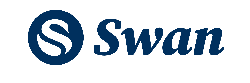

In [20]:
img

In [21]:
from pricing_engine.engine import historical_prices
ticker = 'BTC'
df = historical_prices(ticker)
df

,close,open,high,low,source,url,fx_close,close_converted
date,,,,,,,,
2010-07-17,0.05,0.05,0.05,0.05,cryptocompare,https://min-api.cryptocompare.com/data/v2/hist...,1,0.05
2010-07-18,0.09,0.05,0.09,0.06,cryptocompare,https://min-api.cryptocompare.com/data/v2/hist...,1,0.09
2010-07-19,0.08,0.09,0.09,0.08,cryptocompare,https://min-api.cryptocompare.com/data/v2/hist...,1,0.08
2010-07-20,0.07,0.08,0.08,0.07,cryptocompare,https://min-api.cryptocompare.com/data/v2/hist...,1,0.07
2010-07-21,0.08,0.07,0.08,0.07,cryptocompare,https://min-api.cryptocompare.com/data/v2/hist...,1,0.08
...,...,...,...,...,...,...,...,...
2023-03-20,"27,807.29","28,037.32","28,534.79","27,229.43",cryptocompare,https://min-api.cryptocompare.com/data/v2/hist...,1,"27,807.29"
2023-03-21,"28,185.99","27,807.29","28,498.09","27,411.61",cryptocompare,https://min-api.cryptocompare.com/data/v2/hist...,1,"28,185.99"
2023-03-22,"27,317.37","28,185.99","28,877.16","26,681.65",cryptocompare,https://min-api.cryptocompare.com/data/v2/hist...,1,"27,317.37"


### Plot the Data

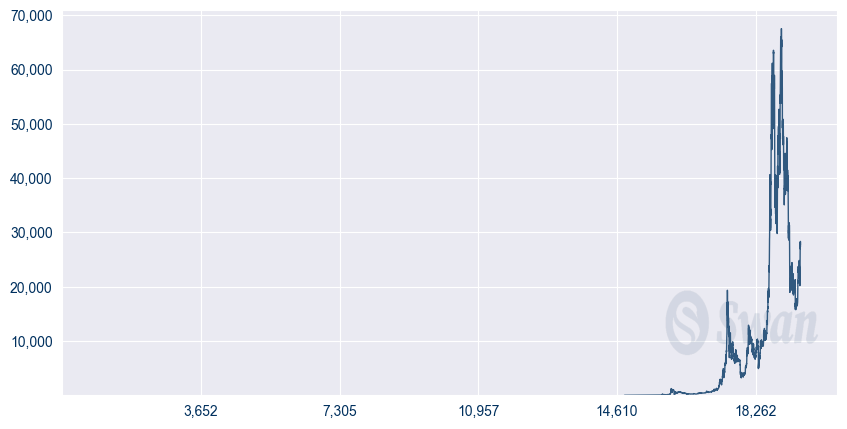

In [38]:
fig, ax = plt.subplots()
add_watermark(ax, img)

# Use the formatter on the y-axis
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)

# Data to plot
plt.plot(df.index, df['close'])

plt.show()